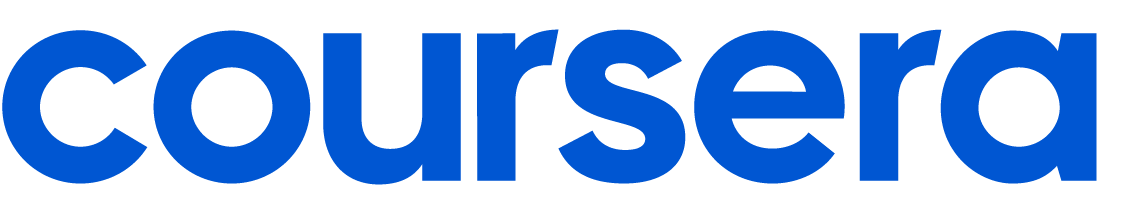

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [53]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', 30)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's acco...
1,MonthlyCharges,Feature,float,The amount charged to the ...
2,TotalCharges,Feature,float,The total charges incurred...
3,SubscriptionType,Feature,object,The type of subscription c...
4,PaymentMethod,Feature,string,The method of payment used...
5,PaperlessBilling,Feature,string,Indicates whether the user...
6,ContentType,Feature,string,The type of content prefer...
7,MultiDeviceAccess,Feature,string,Indicates whether the user...
8,DeviceRegistered,Feature,string,The type of device registe...
9,ViewingHoursPerWeek,Feature,float,The number of hours the us...


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [128]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [117]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [131]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [133]:
train_df.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

No missing values. We are good to go

In [12]:
for col in train_df.columns:
    x = train_df[col].nunique()
    print(col)
    if x > 100:
        print(x)
    else:
        print(train_df[col].value_counts())
    print()

AccountAge
119

MonthlyCharges
243787

TotalCharges
243787

SubscriptionType
Standard    81920
Basic       81050
Premium     80817
Name: SubscriptionType, dtype: int64

PaymentMethod
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: PaymentMethod, dtype: int64

PaperlessBilling
No     121980
Yes    121807
Name: PaperlessBilling, dtype: int64

ContentType
Both        81737
TV Shows    81145
Movies      80905
Name: ContentType, dtype: int64

MultiDeviceAccess
No     122035
Yes    121752
Name: MultiDeviceAccess, dtype: int64

DeviceRegistered
Computer    61147
Tablet      61143
Mobile      60914
TV          60583
Name: DeviceRegistered, dtype: int64

ViewingHoursPerWeek
243787

AverageViewingDuration
243787

ContentDownloadsPerMonth
17    4999
8     4996
39    4995
23    4959
40    4952
43    4952
44    4951
4     4949
33    4929
42    4922
11    4917
3     4914
10    4912
26    4912
16    4911
29    4902
21    4901
5     4897
30

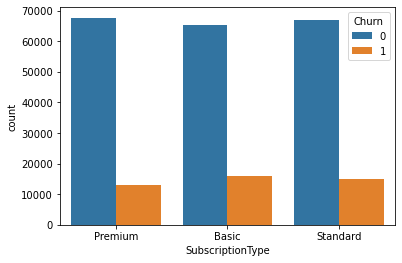

In [25]:
sns.countplot(x='SubscriptionType', hue='Churn', data=train_df)

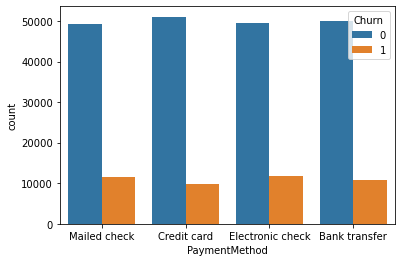

In [26]:
sns.countplot(x='PaymentMethod', hue='Churn', data=train_df)

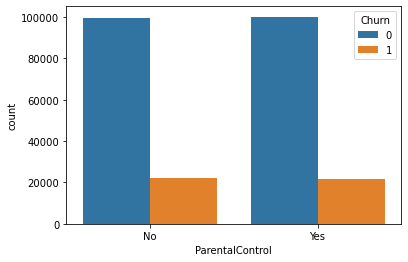

In [34]:
sns.countplot(x='ParentalControl', hue='Churn', data=train_df)

No distinctions can be made by looking at the graphs

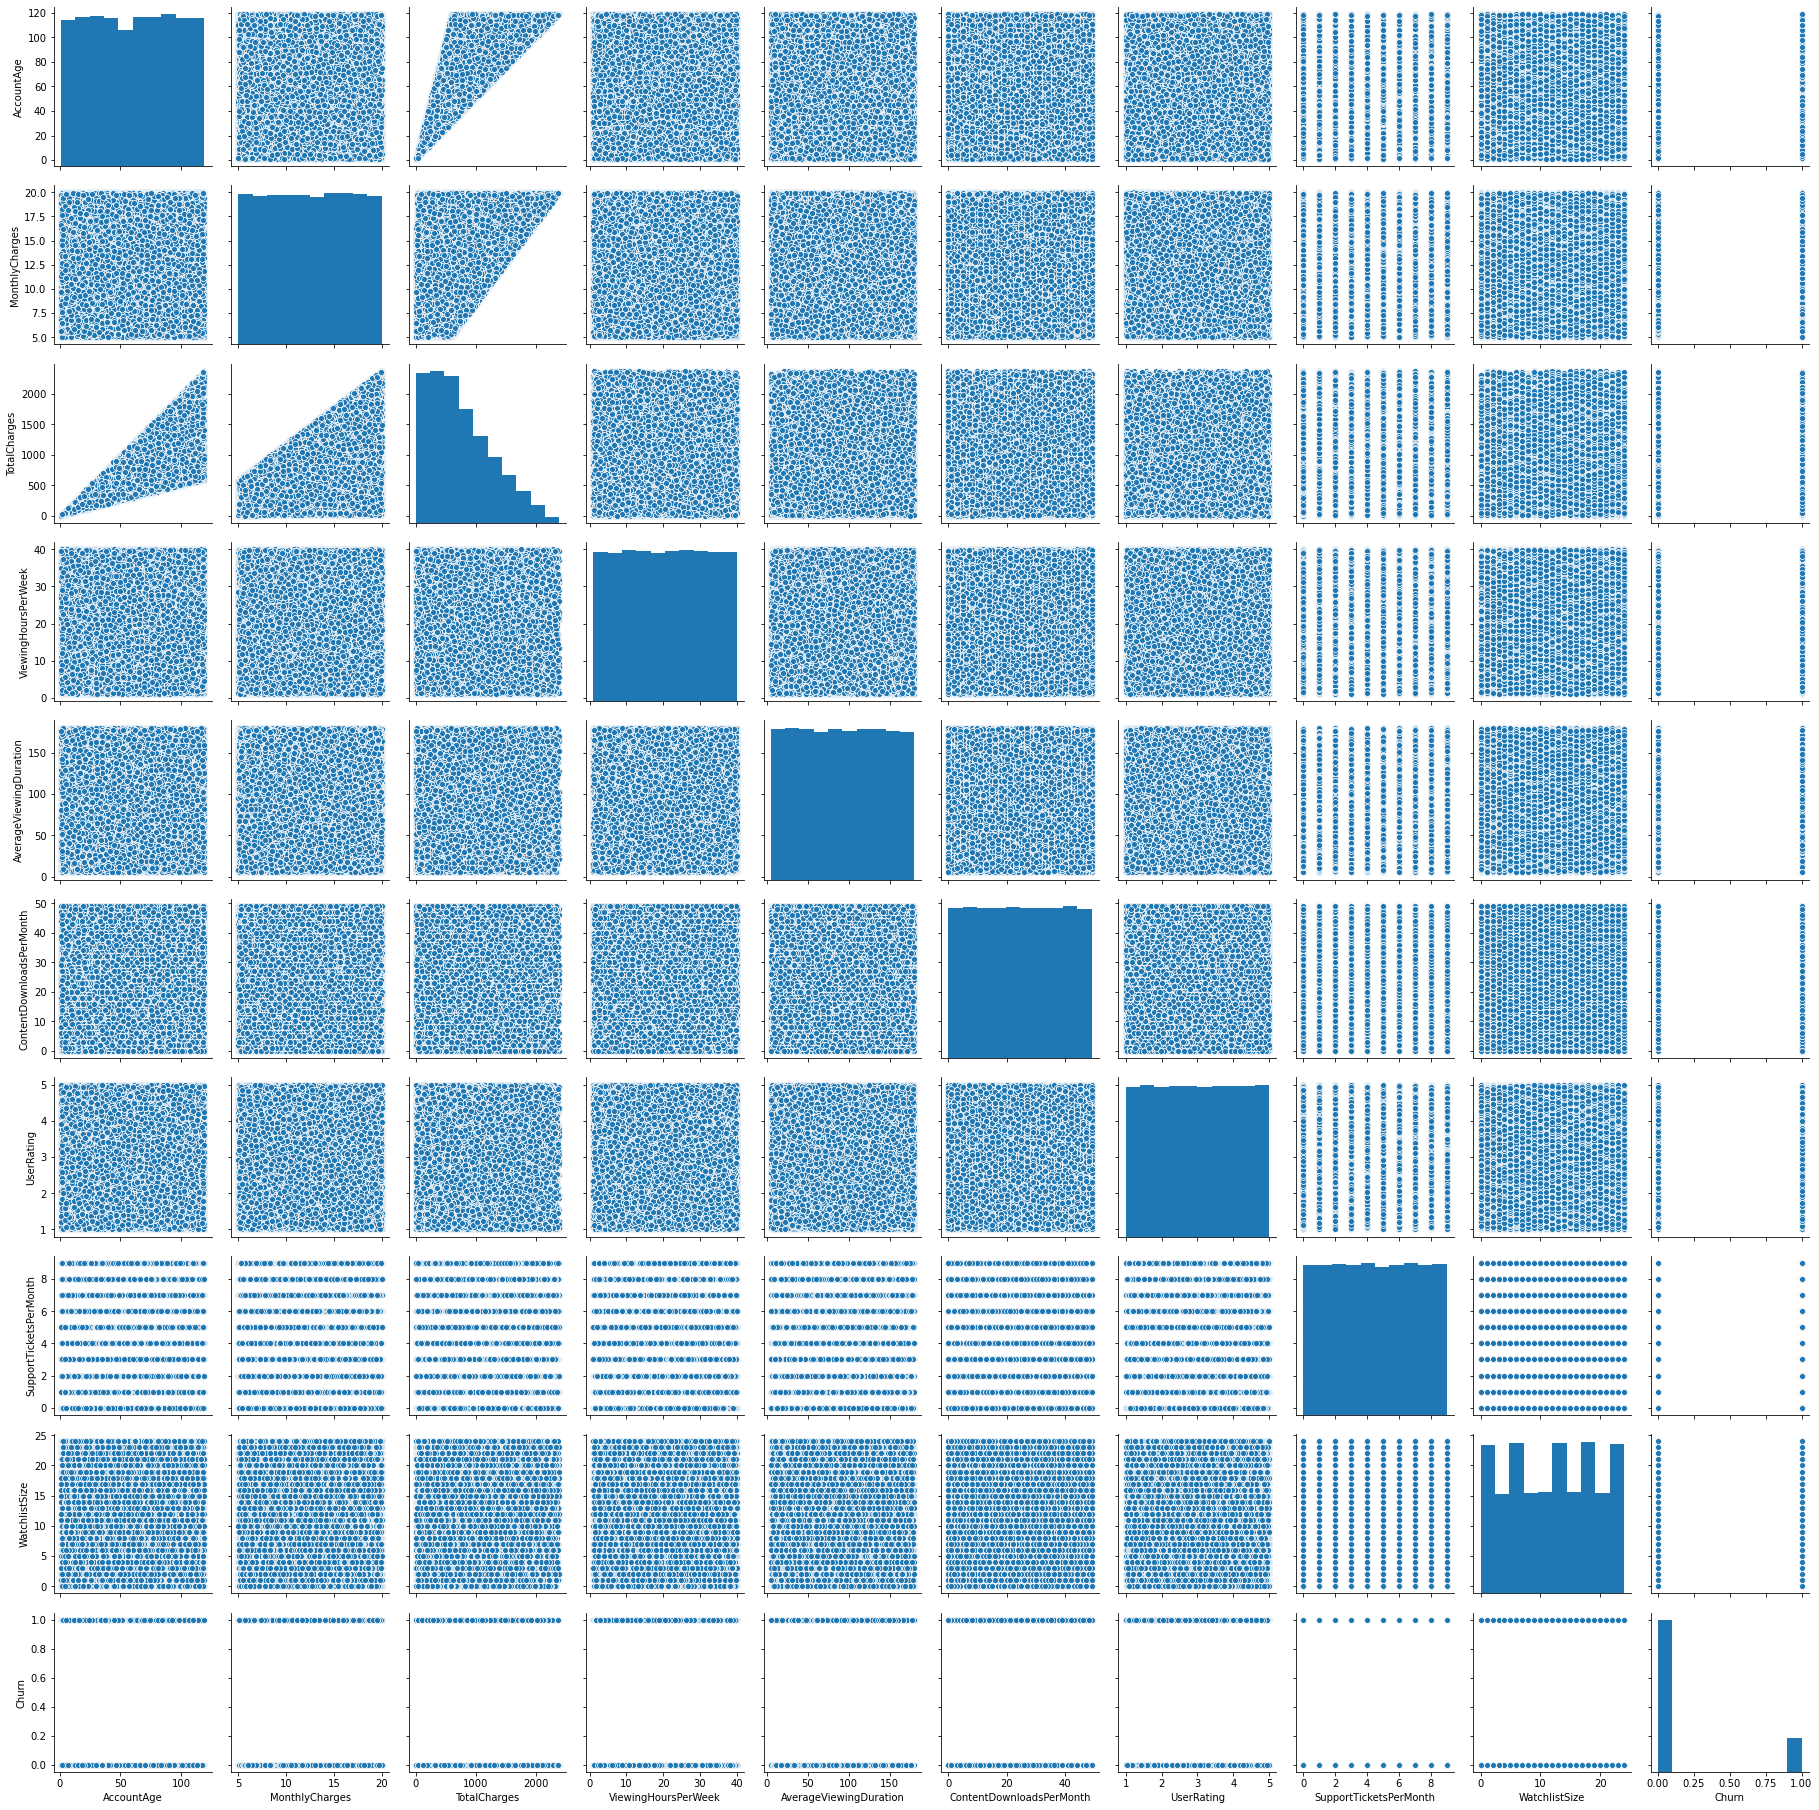

In [35]:
sns.pairplot(train_df)

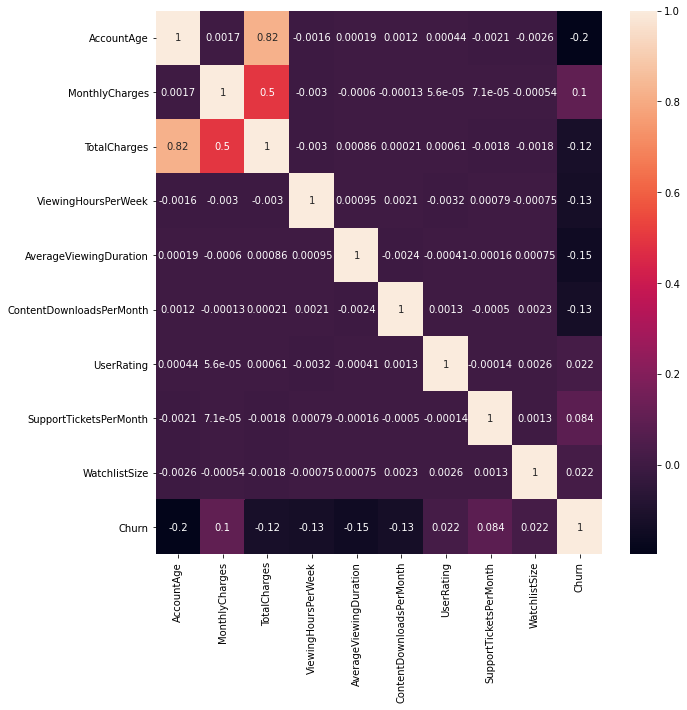

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), annot=True)

Most of the columns are uncorrelated. That's good

## Feature Engineering

In [40]:
X, y = train_df.drop(['CustomerID', 'Churn'], axis=1), train_df['Churn']

In [45]:
numeric_cols = X.select_dtypes(include='number').columns
numeric_cols

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'WatchlistSize'],
      dtype='object')

In [49]:
cat_cols = X.select_dtypes(include='object').columns
cat_cols

Index(['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType',
       'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender',
       'ParentalControl', 'SubtitlesEnabled'],
      dtype='object')

In [39]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

In [129]:
# Converting categorical cols to numerical 
X = pd.get_dummies(X, drop_first=True)

In [58]:
X.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,SubscriptionType_Premium,...,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,1,...,1,0,0,0,0,0,1,1,0,0
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,0,...,0,0,1,0,0,0,0,1,0,1
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,0,...,0,0,0,0,0,1,0,1,1,1
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,0,...,0,0,1,0,1,0,0,1,1,1
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,1,...,0,1,0,1,0,0,0,0,0,0


In [130]:
# calculating mutual information
mutual_info_classif(X, y)

array([0.02026589, 0.00459714, 0.00831097, 0.00817635, 0.00999746,
       0.00941633, 0.00045336, 0.00628191, 0.00171552, 0.00443211,
       0.00449495, 0.00290417, 0.00235903, 0.00307843, 0.01076325,
       0.00385592, 0.00526681, 0.01019073, 0.0024699 , 0.00238709,
       0.00141719, 0.00150643, 0.00111367, 0.0018315 , 0.00167683,
       0.00994722, 0.01036426, 0.01143431])

There is no significant relation between any of the predictors and Churn

## Model training

In [86]:
# Splitting data in train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=32, stratify=y)

In [63]:
# pip install xgboost --quiet

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [65]:
from xgboost import XGBClassifier

In [87]:
xgb = XGBClassifier()

In [88]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [89]:
preds = xgb.predict_proba(X_val)[:,1]

In [90]:
roc_auc_score(y_val, preds, average='weighted')

0.7386829482740125

In [91]:
y_preds = xgb.predict(X_val)

In [92]:
# Accuracy
(y_val == y_preds).sum()/len(y_val)

0.8212806103613766

## Hyperparameter optimization using optuna

In [99]:
# pip install optuna --quiet
import optuna

In [93]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'auc',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    preds = optuna_model.predict_proba(X_val)[:,1]

    # Evaluate predictions
    return roc_auc_score(y_val, preds)

In [100]:
study = optuna.create_study(direction='maximize')

[I 2023-07-18 09:26:17,915] A new study created in memory with name: no-name-0aeeee60-e8ea-42c9-b1f3-753087f3d799


In [101]:
study.optimize(objective, n_trials=10)

[I 2023-07-18 09:26:39,291] Trial 0 finished with value: 0.6782668515593845 and parameters: {'max_depth': 4, 'learning_rate': 0.7647810063226097, 'n_estimators': 354, 'min_child_weight': 9, 'gamma': 9.577212338074727e-08, 'subsample': 0.015620253053820341, 'colsample_bytree': 0.06974214724134545, 'reg_alpha': 1.200493662906172e-08, 'reg_lambda': 0.1514670376587659}. Best is trial 0 with value: 0.6782668515593845.
[I 2023-07-18 09:26:54,171] Trial 1 finished with value: 0.6284074054064858 and parameters: {'max_depth': 6, 'learning_rate': 0.6275030065043474, 'n_estimators': 421, 'min_child_weight': 1, 'gamma': 0.043896888333133106, 'subsample': 0.015526301450300345, 'colsample_bytree': 0.05442479424055877, 'reg_alpha': 0.21707563054983336, 'reg_lambda': 0.00010918855089501026}. Best is trial 0 with value: 0.6782668515593845.
[I 2023-07-18 09:27:25,753] Trial 2 finished with value: 0.742782410560166 and parameters: {'max_depth': 7, 'learning_rate': 0.0287598834454983, 'n_estimators': 361,

In [103]:
study.best_trial.value

0.7466982834835362

In [106]:
params = study.best_trial.params
params

## Make predictions

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

In [5]:
# Fit a XGboost classifier on the feature columns in train_df:
xgb_opt = XGBClassifier(**params)
xgb_opt.fit(X, y)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [ ]:
# converting categorical cols to numeric for test data
test_df_new = pd.get_dummies(test_df.drop('CustomerID', axis=1), drop_first=True)
test_df_new.head()

In [6]:
# make predictions on test_df using `predict_proba` method:
predicted_probability = xgb_opt.predict_proba(test_df_new)[:, 1]

In [7]:
# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability})
prediction_df

In [8]:
print(prediction_df.shape)
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.0
1,LFR4X92X8H,0.0
2,QM5GBIYODA,0.0
3,D9RXTK2K9F,0.0
4,ENTCCHR1LR,0.0
5,7A88BB5IO6,0.0
6,70OMW9XEWR,0.0
7,EL1RMFMPYL,1.0
8,4IA2QPT6ZK,0.0
9,AEDCWHSJDN,0.0


## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [123]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [124]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [125]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [126]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [127]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook.